# python for data science - sesi 9
Note :
## Descriptive statistics

special notes : bimodel

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures of Central Tendecies

### Mean

In [4]:
mean_ = sum(x) / len(x)
print(mean_)

8.7


In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
### kalo pake statistic gabisa ngehandle nan jadi pake np aja
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [7]:
mean_ = np.mean(y)
mean_

8.7

In [8]:
## bisa dipake dengan car function juga
mean_ = y.mean()
mean_

8.7

In [9]:
## meannya numpy juga gabisa handle nan
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [10]:
## bisa pake nanmean buat ignore nan
np.nanmean(y_with_nan)

8.7

In [11]:
mean_ = z.mean()
mean_

8.7

In [12]:
## ini kalo pandas udah langsung ignore nan
z_with_nan.mean()

8.7

### Median

In [13]:
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [17]:
statistics.median_low(x[:-1])

2.5

In [15]:
statistics.median_high(x[:-1])

4

In [18]:
# Unlike most other functions from the Python statistics library, median(), median_low(), 
# and median_high() don’t return nan when there are nan values among the data points:

print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [19]:
median_ = np.median(y)
print(median_)

4.0


In [20]:
median_ = np.median(y[:-1])
print(median_)

3.25


In [21]:
np.median(y_with_nan)

nan

In [22]:
z.median()

4.0

### Modus

In [23]:
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [24]:
mode_ = statistics.mode(u)
mode_

2

In [25]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [26]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [27]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [28]:
## Pandas Series objects have the method .mode() 
## that handles multimodal values well and ignores nan values by default:

u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


## Measure of Variability

### Variance

In [29]:
var_ = statistics.variance(x)
var_

123.2

In [30]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [31]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [32]:
## Pandas skip nan by default
z.var(ddof=1)

123.19999999999999

### Standard Deviation

In [33]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [34]:
np.std(y, ddof=1)

11.099549540409285

In [35]:
z.std(ddof=1)

11.099549540409285

The parameter ddof defaults to 1, so you can omit it. Again, if you want to treat nan values differently, then apply the parameter skipna.

The population standard deviation refers to the entire population. It’s the positive square root of the population variance. You can calculate it just like the sample standard deviation, with the following differences:

Find the square root of the population variance in the pure Python implementation.
Use statistics.pstdev() instead of statistics.stdev().
Specify the parameter ddof=0 if you use NumPy or Pandas. In NumPy, you can omit ddof because its default value is 0. As you can see, you can determine the standard deviation in Python, NumPy, and Pandas in almost the same way as you determine the variance. You use different but analogous functions and methods with the same arguments.

In [36]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [37]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [38]:
#ini pandas
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

### Percentiles

In [39]:
y = np.array(x)

In [40]:
np.percentile(y, 5)

1.3

In [41]:
np.percentile(y, 95)

23.999999999999996

In [42]:
np.percentile(y, 50)

4.0

In [43]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
y = np.array(x)

In [44]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [45]:
np.median(y)

8.0

In [46]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [47]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [48]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)

z.quantile(0.95)

34.919999999999995

In [49]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [50]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

### Range

In [51]:
np.ptp(y)

46.0

In [52]:
np.ptp(z)

46.0

In [53]:
y.max() - y.min()

46.0

### Interquartile range

In [54]:
quartiles = np.quantile(y, [0.25, 0.75])

In [55]:
quartiles

array([ 0.1, 21. ])

In [56]:
quartiles[1] - quartiles[0]

20.9

### Summary of Descriptive stats

In [57]:
result = scipy.stats.describe(y, ddof=1, bias=False)

In [58]:
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [59]:
result.nobs

9

In [60]:
result.mean

11.622222222222222

In [61]:
# pandas
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [62]:
result['mean']

11.622222222222222

In [63]:
result['25%']

0.1

### Measures of Correlation

In [64]:
x = list(range(-10, 11))
print(x)

y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
print(y)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]


In [65]:
x_, y_ = np.array(x), np.array(y)

In [66]:
x__, y__ = pd.Series(x_), pd.Series(y_)

### Covariance

In [68]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [69]:
cov_xy = x__.cov(y__)

In [70]:
cov_xy

19.95

In [71]:
cov_xy = y__.cov(x__)
cov_xy

19.95

## Working with 2d Array

In [72]:
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])

In [73]:
np.mean(a)

5.4

In [74]:
a.mean()

5.4

In [75]:
np.median(a)

2.0

In [76]:
a.var(ddof=1)

53.40000000000001

In [77]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [78]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [79]:
np.median(a, axis=0)

array([4., 3., 1.])

In [80]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [81]:
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [82]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [83]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [84]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [85]:
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [86]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [87]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)

In [88]:
result.mean

array([ 1.,  2.,  5., 13.,  6.])

## Dataframe

In [89]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']

df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [90]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [91]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [92]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [93]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [94]:
df['A'].mean()

6.2

In [95]:
df['A'].var()

37.20000000000001

In [96]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [97]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [98]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [99]:
df.describe().at['mean', 'A']

6.2

In [100]:
df.describe().at['50%', 'B']

3.0

## Visualization

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [102]:
# Box Plot

np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

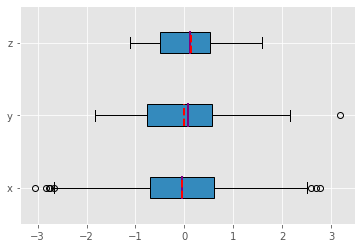

In [103]:
fig, ax = plt.subplots()

ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})

plt.show()